In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/simulations/check

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/simulations/check


## Чтение данных

In [ ]:
def read_description(directory_path, subfolder, file_name = "description.txt"):
  file_path = os.path.join(directory_path, file_name)
  with open(file_path, 'r') as f:
    description_lines = f.readlines()

  params = {}

  for line in description_lines:
      key, value = line.strip().split('=')
      params[key.strip()] = value.strip()

  plateau_stop_match = re.search(r'plateau_stop_(TRUE|FALSE)', subfolder)
  if plateau_stop_match:
      plateau_stop = plateau_stop_match.group(1)
  else:
      plateau_stop = None

  realtime_limit_reached_match = re.search(r'realtime_limit_reached(TRUE|FALSE)', subfolder)
  if realtime_limit_reached_match:
      realtime_limit_reached = realtime_limit_reached_match.group(1)
  else:
      realtime_limit_reached = None
  params["realtime_limit_reached"] = realtime_limit_reached
  params["plateau_stop"] = plateau_stop

  return params

In [ ]:
def read_csv_file(directory_path, name):
  file_path = os.path.join(directory_path, name + ".csv")
  return pd.read_csv(file_path)

In [ ]:
def read_files(directory_path):
  datas = []
  for folder_name in os.listdir(directory_path):
      folder_path = os.path.join(directory_path, folder_name)
      data = {}
      data["params"] = read_description(folder_path, folder_name)
      data["population"] = read_csv_file(folder_path, "population")
      data["population"].drop(data["population"].tail(1).index, inplace=True)
      data["population"].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
      data["smoothed"] = read_csv_file(folder_path, 'exp_pop6')
      data["smoothed"].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
      datas.append(data)
  return datas

In [ ]:
def read_file(directory_path, file_type):
  data = {}
  data["population"] = read_csv_file(directory_path, file_type)
  data["population"].drop(data["population"].tail(1).index, inplace=True)
  data["population"].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  return data

## Построение графиков

In [ ]:
def print_smoothing_in_one_window(print_data1, x, x_name="epochs", start_end = None, title = None, legend1 = "population", legend2 = "smoothing"):
  fig = plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.title(title or "Smoothing")
  fig.tight_layout(pad=6.0,  h_pad=3, w_pad=3)
  fig.patch.set_visible(False)
  columns_count = 2
  axes = fig.subplots(1)

  axes.plot(x, print_data1, "b", label=legend1)
  #axes.plot(x, print_data2, "r", label=legend2)
  axes.legend(loc="lower right")
  axes.set_xlabel(x_name)
  axes.set_ylabel('pop')


In [ ]:
def print_all_in_one_frame(Data, x="time", y = "population", limit = 25000):
  limit = min(limit, len(Data[0][y]))
  type_d = "pop"
  fig = plt.figure(figsize=(40, 5), dpi=80)
  plt.axis('off')
  plt.title("Simulations" )
  fig.patch.set_visible(False)
  axes = fig.subplots(nrows=1, ncols=1)
  for i, data_ in enumerate(Data):
    axes.plot(data_[y][x][:limit], data_[y][type_d][:limit], label="#"+str(i))
    axes.set_xlabel(x)
    axes.set_ylabel(y)
  axes.legend(loc="lower right")


In [ ]:
def plot_two_series(series_list):    
    fig, axs = plt.subplots(1, 2, figsize=(20, 5)) 
    axs[0].plot(series_list[0], "b")
    axs[1].plot(series_list[1], "b")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.show()

## Загрузка данных

In [ ]:
algo_data = read_files("/content/drive/MyDrive/simulations/check/sim_res_4")

In [ ]:
just_data = read_files("/content/drive/MyDrive/simulations/check/check_4")

## Примеры парных симуляций

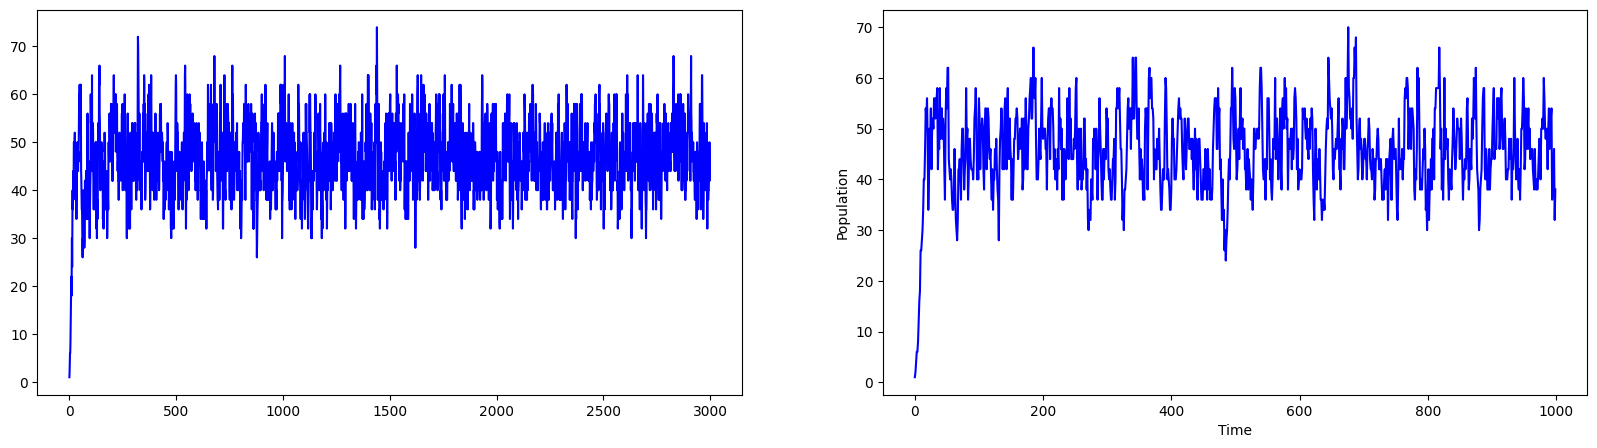

In [ ]:
plot_two_series([just_data[1]["population"]["pop"], algo_data[121]["population"]['pop']])

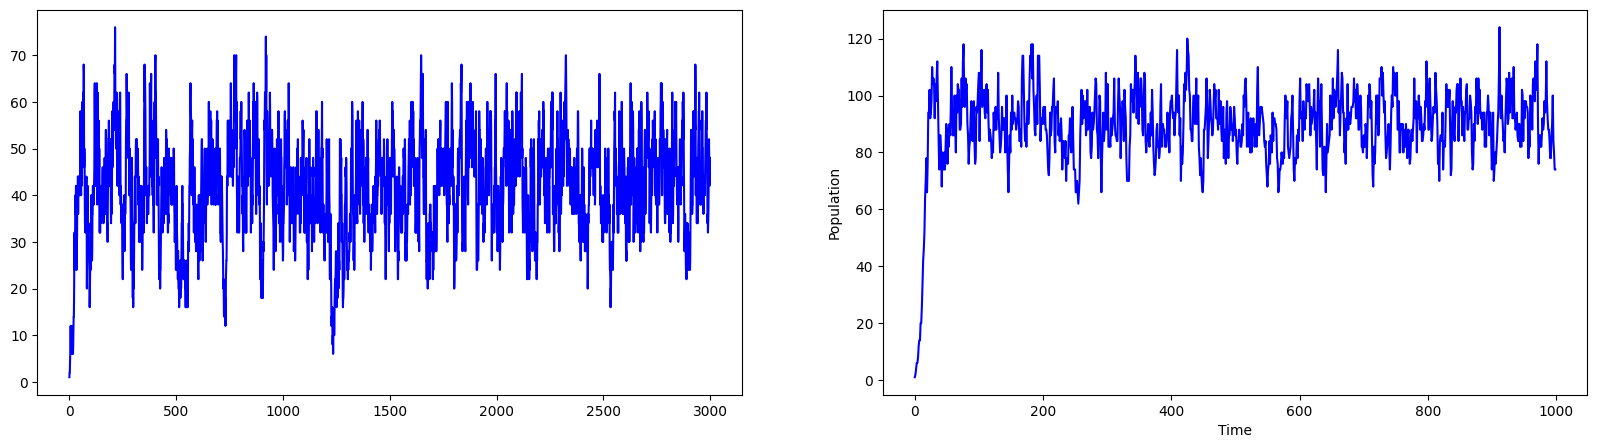

In [ ]:
plot_two_series([just_data[50]["population"]["pop"], algo_data[177]["population"]['pop']])